In [1]:
import os

os.chdir("../")
os.getcwd()

'c:\\Users\\HP\\Desktop\\flight-comptetion\\NNights-team'

In [2]:
from sklearn.ensemble import RandomForestRegressor
from nnights.experiment import Experiment
from nnights.utils import load_flights

In [3]:
# experiment configs
config = {
    'enrich': ['add_day_of_year', 'encode_locations'],
    'model': {
        'model_instance': RandomForestRegressor,
        'model_params': {'max_depth': 15},
        'train_params': {
            'use_cv': True,
            'scale': {'li_features': []},
        }
    },
    'x_columns': ['avg_weeks', 'std_weeks'],
}

config_grid = {
    'model_instance': RandomForestRegressor,
    'grid_config': {
        'param_grid': {'max_depth': [6, 12]},
        'cv': 10,
        'n_jobs': 5
    }
}

In [4]:
# load data
flights_train = load_flights(dtype='train')
flights_test = load_flights(dtype='test')

# init experiment
exp = Experiment(
    name="test-exp", 
    data=flights_train
)

-- Enrich start ------------- 
add_day_of_year  ...
encode_locations  ...
-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks', 'day_of_year', 'from_enc', 'to_enc']
> fit model ...
model : RandomForestRegressor(max_depth=15)
> cv results : 


> score model ...
RMSE on train : 0.39540367030021595
RMSE on test : 0.7273631765281958
--Feat imporance  ...
 


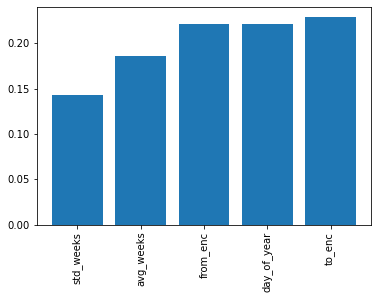

In [5]:
# run experiment
exp.run(config)

In [6]:
exp.meta["cache"]['model']

RandomForestRegressor(max_depth=15)

In [7]:
score, best_params = exp.grid_search(config=config_grid)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [8]:
best_params

{'max_depth': 12}

In [12]:
exp.freeze("submissions", flights_test, with_sub=True)

Successfully created the directory submissions/test-exp
add_day_of_year  ...
encode_locations  ...
[10.37503816 11.93530495 10.82903    10.62265998 11.00989189]
generate submission  submissions/test-exp/submission.csv
